<a href="https://colab.research.google.com/github/Heimeinsheu/software_defects_phase1/blob/main/DissertationSMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SMOTE (Synthetic Minority Over-sampling Technique).**
The second resampling technique is called, Oversampling. This process is a little more complicated than undersampling. It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class. There are a number of methods used to oversample a dataset for a typical classification problem. The most common technique is called **SMOTE (Synthetic Minority Over-sampling Technique)**. In simple terms, it looks at the feature space for the minority class data points and considers its k nearest neighbours.

#Importing Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE

from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
kc2_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/softwareDefect.csv")
jm1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/jm1.csv")
ar1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar1.csv")
ar3_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar3.csv")
ar4_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar4.csv")
ar5_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar5.csv")
ar6_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar6.csv")
kc1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/kc1.csv")
cm1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/cm1.csv")
pc1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/pc1.csv")

#Attribute Information:
 
 	
      1. loc             :   % McCabe's line count of code
      2. v(g)            :   % McCabe "cyclomatic complexity"
      3. ev(g)           :   % McCabe "essential complexity"
      4. iv(g)           :   % McCabe "design complexity"
      5. n               :   % Halstead total operators + operands
      6. v               :   % Halstead "volume"
      7. l               :   % Halstead "program length"
      8. d               :   % Halstead "difficulty"
      9. i               :   % Halstead "intelligence"
     10. e               :   % Halstead "effort"
     11. b               :   % Halstead 
     12. t               :   % Halstead's time estimator
     13. lOCode          :   % Halstead's line count
     14. lOComment       :   % Halstead's count of lines of comments
     15. lOBlank         :   % Halstead's count of blank lines
     16. lOCodeAndComment:  
     17. uniq_Op         :   % unique operators
     18. uniq_Opnd       :   % unique operands
     19. total_Op        :   % total operators
     20. total_Opnd      :   % total operands
     21. branchCount     :   % of the flow graph
     22. problems        : {no,yes}% module has/has not one or more 
                                   % reported defects


####**Calculate Numbers of Column in each dataset**

In [ ]:
print("attributes in jm1: ",jm1_df.shape[1])
print("attributes in ar1: ",ar1_df.shape[1])
print("attributes in ar3: ",ar3_df.shape[1])
print("attributes in ar4: ",ar4_df.shape[1])
print("attributes in ar5: ",ar5_df.shape[1])
print("attributes in ar6: ",ar6_df.shape[1])
print("attributes in kc1: ",kc1_df.shape[1])
print("attributes in cm1: ",cm1_df.shape[1])
print("attributes in pc1: ",pc1_df.shape[1])

attributes in jm1:  22
attributes in ar1:  30
attributes in ar3:  30
attributes in ar4:  30
attributes in ar5:  30
attributes in ar6:  30
attributes in kc1:  22
attributes in cm1:  22
attributes in pc1:  22


####**Assigning Header to each dataset**

In [ ]:
# adding column name to the respective columns
kc2_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
kc1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
cm1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
pc1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
jm1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
ar1_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','defects']
ar3_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','defects']
ar4_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','defects']
ar5_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','defects']
ar6_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','defects']


###**Checking type of each attribute in dataset.**

In [ ]:
print(kc1_df.dtypes)

l_count                    int64
cyclomatic_complexity      int64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                    int64
uniq_Opnd                  int64
total_Op                   int64
total_Opnd                 int64
branchCount                int64
problems                    bool
dtype: object


In [ ]:
print(kc2_df.dtypes)

l_count                    int64
cyclomatic_complexity    float64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                    int64
uniq_Opnd                  int64
total_Op                   int64
total_Opnd                 int64
branchCount                int64
problems                  object
dtype: object


In [ ]:
kc2_df

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1,1.0,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,yes
1,415,59.0,50,51,1159,8411.31,0.01,103.53,81.24,870848.58,...,359,35,9,10,47,106,692,467,106,yes
2,230,33.0,10,16,575,3732.82,0.03,39.82,93.74,148644.06,...,174,15,34,5,23,67,343,232,65,yes
3,175,26.0,12,13,500,3123.96,0.03,29.48,105.96,92103.07,...,142,7,19,4,18,58,310,190,51,yes
4,163,16.0,13,11,440,2714.77,0.03,32.25,84.14,87589.65,...,139,2,20,0,19,53,260,180,31,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,4,1.0,1,1,5,11.61,0.50,2.00,5.80,23.22,...,2,0,0,0,4,1,4,1,1,yes
517,4,1.0,1,1,4,8.00,0.67,1.50,5.33,12.00,...,2,0,0,0,3,1,3,1,1,yes
518,4,1.0,1,1,4,8.00,0.67,1.50,5.33,12.00,...,2,0,0,0,3,1,3,1,1,yes
519,4,1.0,1,1,5,11.61,0.67,1.50,7.74,17.41,...,2,0,0,0,3,2,3,2,1,yes


In [ ]:
print(jm1_df.dtypes)

l_count                    int64
cyclomatic_complexity      int64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                   object
uniq_Opnd                 object
total_Op                  object
total_Opnd                object
branchCount               object
problems                    bool
dtype: object


In [ ]:
jm1_df.loc[jm1_df['uniq_Op']=='?'].count()

l_count                  5
cyclomatic_complexity    5
essential_complexity     5
design_complexity        5
n                        5
v                        5
l                        5
d                        5
i                        5
e                        5
b                        5
t                        5
lOCode                   5
lOComment                5
lOBlank                  5
lOCodeAndComment         5
uniq_Op                  5
uniq_Opnd                5
total_Op                 5
total_Opnd               5
branchCount              5
problems                 5
dtype: int64

In [ ]:
jm1_df.drop(jm1_df.loc[jm1_df['uniq_Op']=="?"].index, inplace=True)

While converting attribute having object type into numeric type. I encounter many rows contain '?' value in respective attribute having object datatype.<br>
Performing drop() on that rows.

In [ ]:
jm1_df[['uniq_Op', 'uniq_Opnd','total_Op','total_Opnd','branchCount']] = jm1_df[['uniq_Op', 'uniq_Opnd','total_Op','total_Opnd','branchCount']].apply(pd.to_numeric)

In [ ]:
jm1_df.iloc[141:144,]

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
141,71,5,1,4,223,1338.00,0.06,16.07,83.25,21503.57,...,57,1,11,0,15,49,118,105,9,True
143,87,10,5,4,0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,18,True
144,19,2,1,2,43,188.87,0.12,8.64,21.87,1631.15,...,9,1,4,0,10,11,24,19,3,True


In [ ]:
print(pc1_df.dtypes)

l_count                    int64
cyclomatic_complexity      int64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                    int64
uniq_Opnd                  int64
total_Op                   int64
total_Opnd                 int64
branchCount                int64
problems                    bool
dtype: object


In [ ]:
print(cm1_df.dtypes)

l_count                    int64
cyclomatic_complexity      int64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                    int64
uniq_Opnd                  int64
total_Op                   int64
total_Opnd                 int64
branchCount                int64
problems                    bool
dtype: object


In [ ]:
print(ar1_df.dtypes)

total_loc                             int64
blank_loc                             int64
comment_loc                           int64
code_and_comment_loc                  int64
executable_loc                        int64
unique_operands                       int64
unique_operators                      int64
total_operands                        int64
total_operators                       int64
halstead_vocabulary                   int64
halstead_length                       int64
halstead_volume                       int64
halstead_level                      float64
halstead_difficulty                 float64
halstead_effort                     float64
halstead_error                      float64
halstead_time                       float64
branch_count                          int64
decision_count                        int64
call_pairs                            int64
condition_count                       int64
multiple_condition_count              int64
cyclomatic_complexity           

In [ ]:
print(ar3_df.dtypes)

total_loc                             int64
blank_loc                             int64
comment_loc                           int64
code_and_comment_loc                  int64
executable_loc                        int64
unique_operands                       int64
unique_operators                      int64
total_operands                        int64
total_operators                       int64
halstead_vocabulary                   int64
halstead_length                       int64
halstead_volume                       int64
halstead_level                      float64
halstead_difficulty                 float64
halstead_effort                     float64
halstead_error                      float64
halstead_time                       float64
branch_count                          int64
decision_count                        int64
call_pairs                            int64
condition_count                       int64
multiple_condition_count              int64
cyclomatic_complexity           

In [ ]:
print(ar4_df.dtypes)

total_loc                             int64
blank_loc                             int64
comment_loc                           int64
code_and_comment_loc                  int64
executable_loc                        int64
unique_operands                       int64
unique_operators                      int64
total_operands                        int64
total_operators                       int64
halstead_vocabulary                   int64
halstead_length                       int64
halstead_volume                       int64
halstead_level                      float64
halstead_difficulty                 float64
halstead_effort                     float64
halstead_error                      float64
halstead_time                       float64
branch_count                          int64
decision_count                        int64
call_pairs                            int64
condition_count                       int64
multiple_condition_count              int64
cyclomatic_complexity           

In [ ]:
print(ar5_df.dtypes)

total_loc                             int64
blank_loc                             int64
comment_loc                           int64
code_and_comment_loc                  int64
executable_loc                        int64
unique_operands                       int64
unique_operators                      int64
total_operands                        int64
total_operators                       int64
halstead_vocabulary                   int64
halstead_length                       int64
halstead_volume                       int64
halstead_level                      float64
halstead_difficulty                 float64
halstead_effort                     float64
halstead_error                      float64
halstead_time                       float64
branch_count                          int64
decision_count                        int64
call_pairs                            int64
condition_count                       int64
multiple_condition_count              int64
cyclomatic_complexity           

In [ ]:
print(ar6_df.dtypes)

total_loc                             int64
blank_loc                             int64
comment_loc                           int64
code_and_comment_loc                  int64
executable_loc                        int64
unique_operands                       int64
unique_operators                      int64
total_operands                        int64
total_operators                       int64
halstead_vocabulary                   int64
halstead_length                       int64
halstead_volume                       int64
halstead_level                      float64
halstead_difficulty                 float64
halstead_effort                     float64
halstead_error                      float64
halstead_time                       float64
branch_count                        float64
decision_count                        int64
call_pairs                            int64
condition_count                       int64
multiple_condition_count              int64
cyclomatic_complexity           

####**Converting attribute type from object to bool of respective dataset**
**kc2** is the only dataset that consist object type in **"problems"** attribute.

In [ ]:
kc2_df['problems'] = kc2_df['problems'].map({'yes':True ,'no':False})

In [ ]:
print(kc2_df.dtypes)

l_count                    int64
cyclomatic_complexity    float64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                    int64
uniq_Opnd                  int64
total_Op                   int64
total_Opnd                 int64
branchCount                int64
problems                    bool
dtype: object


####**Checking for null values**

In [ ]:
kc1_df.isnull().sum()

l_count                  0
cyclomatic_complexity    0
essential_complexity     0
design_complexity        0
n                        0
v                        0
l                        0
d                        0
i                        0
e                        0
b                        0
t                        0
lOCode                   0
lOComment                0
lOBlank                  0
lOCodeAndComment         0
uniq_Op                  0
uniq_Opnd                0
total_Op                 0
total_Opnd               0
branchCount              0
problems                 0
dtype: int64

In [ ]:
kc2_df.isnull().sum()

l_count                  0
cyclomatic_complexity    0
essential_complexity     0
design_complexity        0
n                        0
v                        0
l                        0
d                        0
i                        0
e                        0
b                        0
t                        0
lOCode                   0
lOComment                0
lOBlank                  0
lOCodeAndComment         0
uniq_Op                  0
uniq_Opnd                0
total_Op                 0
total_Opnd               0
branchCount              0
problems                 0
dtype: int64

In [ ]:
cm1_df.isnull().sum()

l_count                  0
cyclomatic_complexity    0
essential_complexity     0
design_complexity        0
n                        0
v                        0
l                        0
d                        0
i                        0
e                        0
b                        0
t                        0
lOCode                   0
lOComment                0
lOBlank                  0
lOCodeAndComment         0
uniq_Op                  0
uniq_Opnd                0
total_Op                 0
total_Opnd               0
branchCount              0
problems                 0
dtype: int64

In [ ]:
pc1_df.isnull().sum()

l_count                  0
cyclomatic_complexity    0
essential_complexity     0
design_complexity        0
n                        0
v                        0
l                        0
d                        0
i                        0
e                        0
b                        0
t                        0
lOCode                   0
lOComment                0
lOBlank                  0
lOCodeAndComment         0
uniq_Op                  0
uniq_Opnd                0
total_Op                 0
total_Opnd               0
branchCount              0
problems                 0
dtype: int64

In [ ]:
jm1_df.isnull().sum()

l_count                  0
cyclomatic_complexity    0
essential_complexity     0
design_complexity        0
n                        0
v                        0
l                        0
d                        0
i                        0
e                        0
b                        0
t                        0
lOCode                   0
lOComment                0
lOBlank                  0
lOCodeAndComment         0
uniq_Op                  0
uniq_Opnd                0
total_Op                 0
total_Opnd               0
branchCount              0
problems                 0
dtype: int64

In [ ]:
ar1_df.isnull().sum()

total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

In [ ]:
ar3_df.isnull().sum()

total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

In [ ]:
ar4_df.isnull().sum()

total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

In [ ]:
ar5_df.isnull().sum()

total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

In [ ]:
ar6_df.isnull().sum()

total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

# Base measures: 
mu1             = number of unique operators<br>
mu2             = number of unique operands<br>
N1              = total occurrences of operators<br>
N2              = total occurrences of operands<br>
length     = N  = N1 + N2<br>
vocabulary = mu = mu1 + mu2<br><br>
**Constants set for each function:**<br>
mu1' =  2 = potential operator count (just the function name and the "return" operator)<br>
mu2'= potential operand count. (the number of arguments to the module)<br>    
For example, the expression "return max(w+x,x+y)" has "N1=4" operators "return, max, +,+)", "N2=4" operands (w,x,x,y),"mu1=3" unique operators (return, max,+), and "mu2=3" unique operands (w,x,y).<br>
<br> 
**Derived measures:**<br>
P = volume = V = N * log2(mu) (the number of mental comparisons needed to write a program of length N)<br>
V* = volume on minimal implementation = (2 + mu2')*log2(2 + mu2')<br>
L  = program length = V*/N<br>
D  = difficulty = 1/L<br>
L' = 1/D <br>
I  = intelligence = L'*V'<br>
E  = effort to write program = V/L<br> 
T  = time to write program = E/18 seconds<br>

###Class Imbalance in each dataset.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


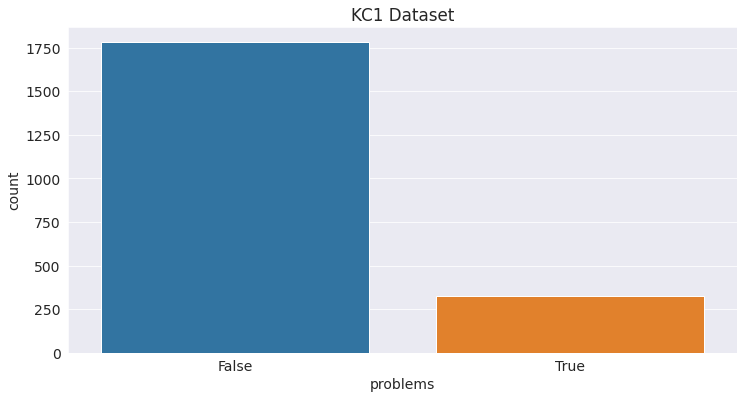

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('KC1 Dataset')
sns.set_style("darkgrid")

sns.countplot(kc1_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


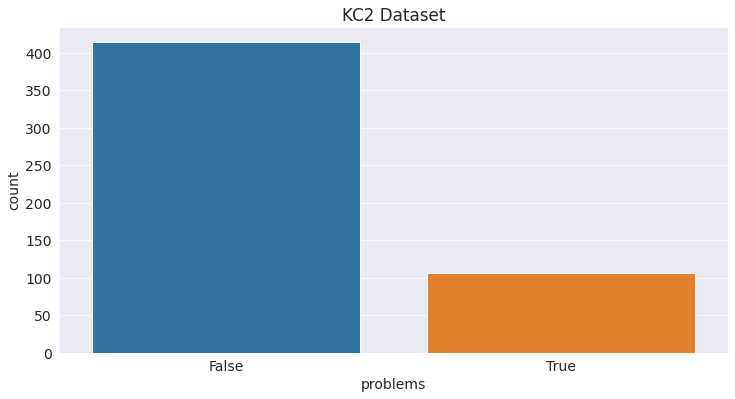

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('KC2 Dataset')
sns.set_style("darkgrid")

sns.countplot(kc2_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


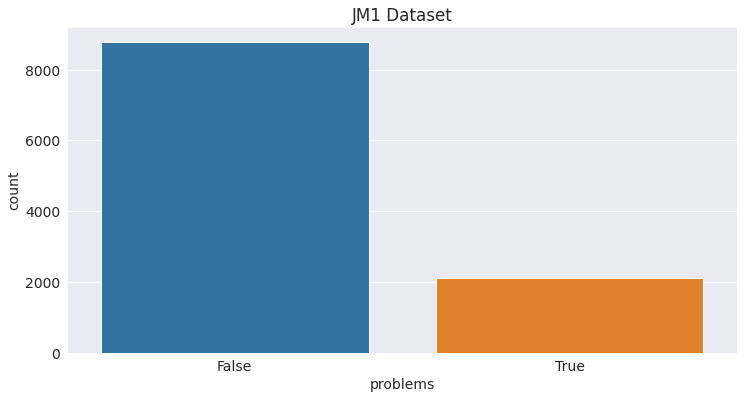

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('JM1 Dataset')
sns.set_style("darkgrid")

sns.countplot(jm1_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


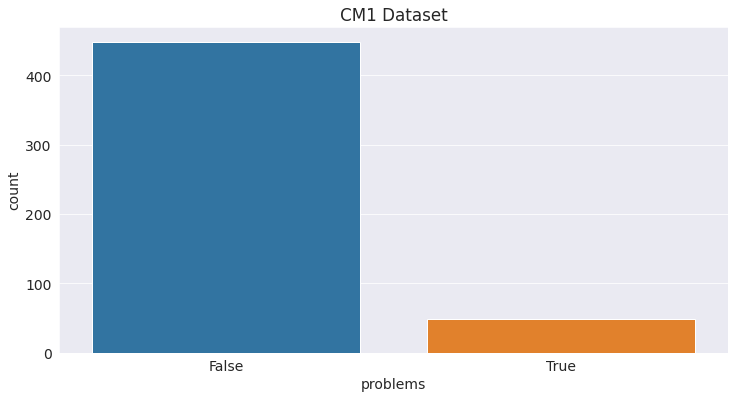

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('CM1 Dataset')
sns.set_style("darkgrid")

sns.countplot(cm1_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


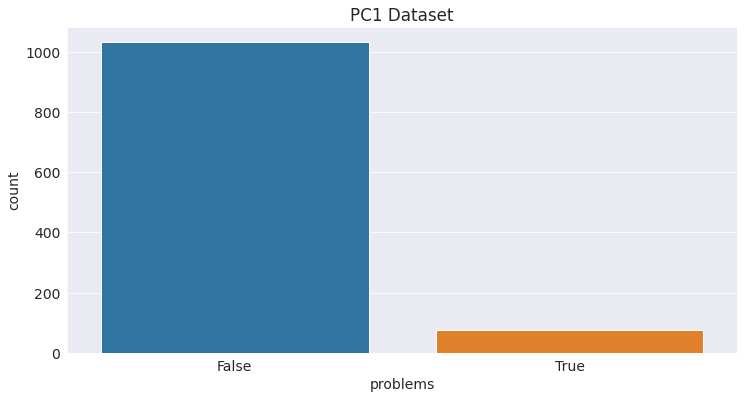

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('PC1 Dataset')
sns.set_style("darkgrid")

sns.countplot(pc1_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


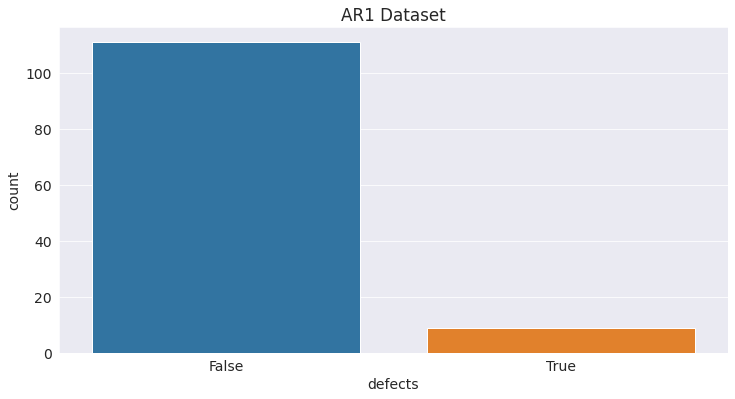

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR1 Dataset')
sns.set_style("darkgrid")

sns.countplot(ar1_df.defects);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


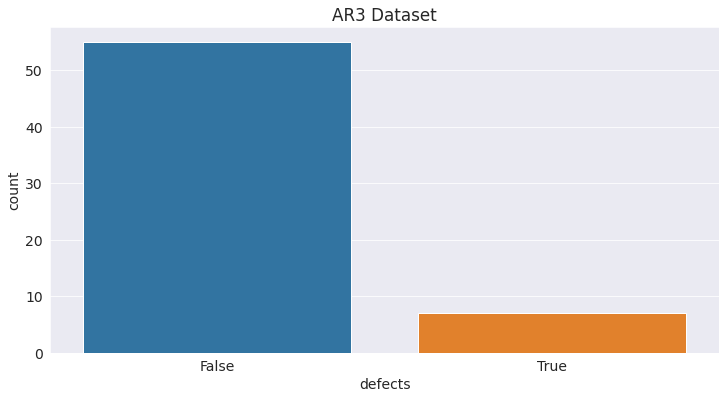

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR3 Dataset')
sns.set_style("darkgrid")

sns.countplot(ar3_df.defects);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


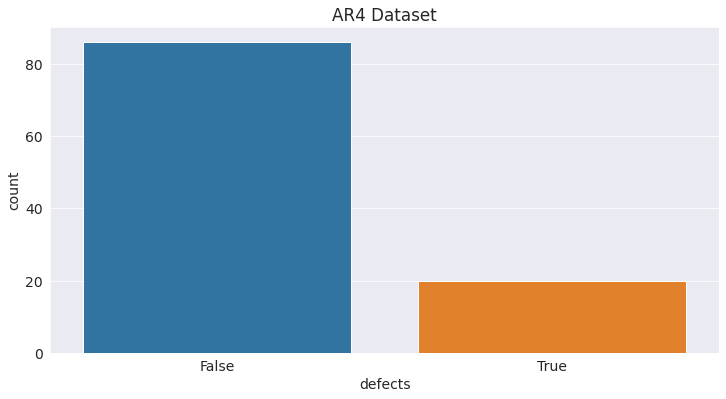

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR4 Dataset')
sns.set_style("darkgrid")

sns.countplot(ar4_df.defects);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


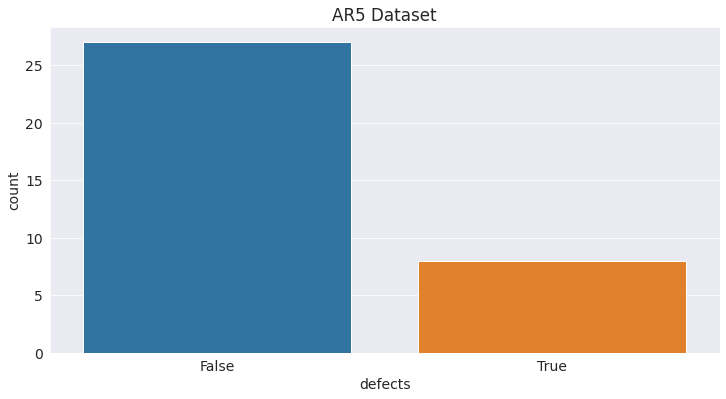

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR5 Dataset')
sns.set_style("darkgrid")

sns.countplot(ar5_df.defects);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


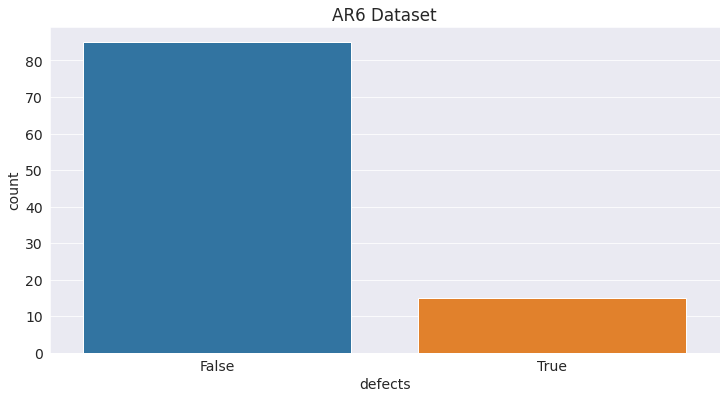

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR6 Dataset')
sns.set_style("darkgrid")

sns.countplot(ar6_df.defects);

In [ ]:
# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

#**kc2 Dataset**

In [ ]:
kc2_df

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1,1.0,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
1,415,59.0,50,51,1159,8411.31,0.01,103.53,81.24,870848.58,...,359,35,9,10,47,106,692,467,106,True
2,230,33.0,10,16,575,3732.82,0.03,39.82,93.74,148644.06,...,174,15,34,5,23,67,343,232,65,True
3,175,26.0,12,13,500,3123.96,0.03,29.48,105.96,92103.07,...,142,7,19,4,18,58,310,190,51,True
4,163,16.0,13,11,440,2714.77,0.03,32.25,84.14,87589.65,...,139,2,20,0,19,53,260,180,31,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,4,1.0,1,1,5,11.61,0.50,2.00,5.80,23.22,...,2,0,0,0,4,1,4,1,1,True
517,4,1.0,1,1,4,8.00,0.67,1.50,5.33,12.00,...,2,0,0,0,3,1,3,1,1,True
518,4,1.0,1,1,4,8.00,0.67,1.50,5.33,12.00,...,2,0,0,0,3,1,3,1,1,True
519,4,1.0,1,1,5,11.61,0.67,1.50,7.74,17.41,...,2,0,0,0,3,2,3,2,1,True


##**Spiliting DataSet**

Training: 80%
Testing: 20%



In [ ]:
x_kc2 = kc2_df.iloc[:,:-1]
y_kc2 = kc2_df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_kc2,y_kc2,test_size=0.20,random_state=0)

##Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


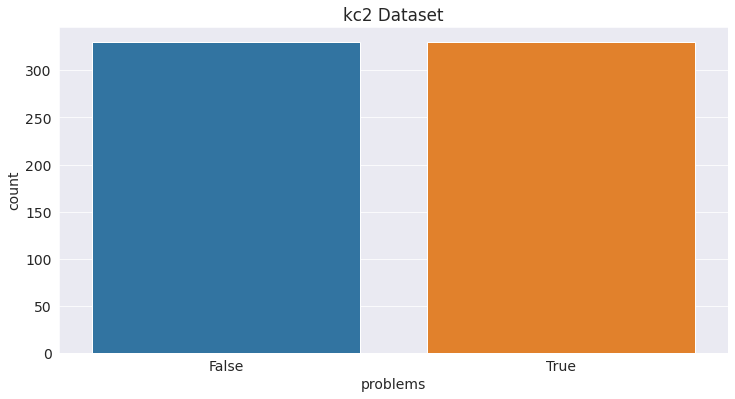

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

##**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=10)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=10)

In [ ]:
y_pred= classifier.predict(x_test)  
print(y_pred)

[False False False False False False  True False False False False  True
 False False  True False False False False False False False  True False
 False False False False False  True False False False False False False
 False  True  True False  True False  True  True  True  True False False
 False  True False False False False False False  True False False False
 False False False  True  True False  True False False  True  True  True
 False False  True  True False False  True False  True  True False False
 False  True False False False False False False False False False False
  True  True False False False False False False  True]


In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[67 17]
 [ 9 12]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  67 
False positives:  17 
False negatives:  9 
True Positives:  12


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7523809523809524

In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7523809523809524


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.80      0.84        84
        True       0.41      0.57      0.48        21

    accuracy                           0.75       105
   macro avg       0.65      0.68      0.66       105
weighted avg       0.79      0.75      0.77       105



##**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[70 14]
 [10 11]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  70 
False positives:  14 
False negatives:  10 
True Positives:  11


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7714285714285715


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.83      0.85        84
        True       0.44      0.52      0.48        21

    accuracy                           0.77       105
   macro avg       0.66      0.68      0.67       105
weighted avg       0.79      0.77      0.78       105



##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=10)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[75  9]
 [ 6 15]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  75 
False positives:  9 
False negatives:  6 
True Positives:  15


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8571428571428571


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.89      0.91        84
        True       0.62      0.71      0.67        21

    accuracy                           0.86       105
   macro avg       0.78      0.80      0.79       105
weighted avg       0.87      0.86      0.86       105



##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[75  9]
 [ 6 15]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  75 
False positives:  9 
False negatives:  6 
True Positives:  15


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8571428571428571


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.89      0.91        84
        True       0.62      0.71      0.67        21

    accuracy                           0.86       105
   macro avg       0.78      0.80      0.79       105
weighted avg       0.87      0.86      0.86       105



##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[75  9]
 [ 6 15]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  75 
False positives:  9 
False negatives:  6 
True Positives:  15


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 0.9893939393939394
Test data accuracy: 0.8380952380952381


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.87      0.90        84
        True       0.58      0.71      0.64        21

    accuracy                           0.84       105
   macro avg       0.75      0.79      0.77       105
weighted avg       0.85      0.84      0.84       105



#**kc1 Dataset**

In [ ]:
kc1_df

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
1,83,11,1,11,171,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18,25,107,64,21,True
2,46,8,6,8,141,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16,28,89,52,15,True
3,25,3,1,3,58,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11,10,41,17,5,True
4,43,3,1,3,115,569.73,0.09,11.27,50.53,6423.73,...,35,2,4,0,11,20,74,41,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103,19,2,1,2,40,175.69,0.15,6.82,25.77,1197.90,...,12,1,2,0,10,11,25,15,3,False
2104,23,3,3,3,60,278.63,0.10,9.69,28.75,2700.58,...,18,1,2,0,12,13,39,21,5,False
2105,2,1,1,1,4,8.00,0.67,1.50,5.33,12.00,...,0,0,0,0,3,1,3,1,1,False
2106,13,1,1,1,17,60.94,0.25,4.00,15.24,243.78,...,6,0,5,0,6,6,9,8,1,False


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = kc1_df.iloc[:,:-1]
y = kc1_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

###Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


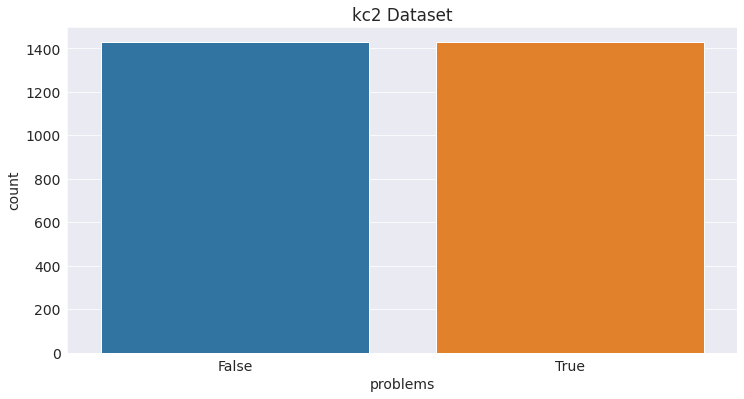

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  0.7725118483412322
Confusion Matrix: 
 [[280  73]
 [ 23  46]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  280 
False positives:  73 
False negatives:  23 
True Positives:  46


###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[289  64]
 [ 25  44]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  289 
False positives:  64 
False negatives:  25 
True Positives:  44


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7890995260663507


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.82      0.87       353
        True       0.41      0.64      0.50        69

    accuracy                           0.79       422
   macro avg       0.66      0.73      0.68       422
weighted avg       0.84      0.79      0.81       422



##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[322  31]
 [ 41  28]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  322 
False positives:  31 
False negatives:  41 
True Positives:  28


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8293838862559242


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.91      0.90       353
        True       0.47      0.41      0.44        69

    accuracy                           0.83       422
   macro avg       0.68      0.66      0.67       422
weighted avg       0.82      0.83      0.82       422



##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[315  38]
 [ 43  26]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  315 
False positives:  38 
False negatives:  43 
True Positives:  26


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8080568720379147


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.89      0.89       353
        True       0.41      0.38      0.39        69

    accuracy                           0.81       422
   macro avg       0.64      0.63      0.64       422
weighted avg       0.80      0.81      0.81       422



##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[315  38]
 [ 43  26]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  315 
False positives:  38 
False negatives:  43 
True Positives:  26


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 0.9888033589923023
Test data accuracy: 0.8199052132701422


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.90      0.89       353
        True       0.44      0.41      0.42        69

    accuracy                           0.82       422
   macro avg       0.67      0.65      0.66       422
weighted avg       0.81      0.82      0.82       422



#**cm1 Dataset**

In [ ]:
cm1_df

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
1,24,5,1,3,63,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15,15,44,19,9,False
2,20,4,4,2,47,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16,8,31,16,7,False
3,24,6,6,2,72,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16,12,46,26,11,False
4,24,6,6,2,72,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16,12,46,26,11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,47,3,1,3,256,1563.78,0.04,28.00,55.85,43785.90,...,2,13,2,0,23,46,144,112,5,True
493,24,4,3,3,107,587.63,0.05,19.13,30.72,11241.58,...,1,7,4,0,22,23,67,40,7,True
494,82,11,3,10,475,3155.83,0.02,44.71,70.59,141084.24,...,9,59,35,0,32,68,285,190,21,True
495,10,2,1,1,32,150.41,0.15,6.50,23.14,977.69,...,1,12,4,0,13,13,19,13,3,True


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = cm1_df.iloc[:,:-1]
y = cm1_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

###Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


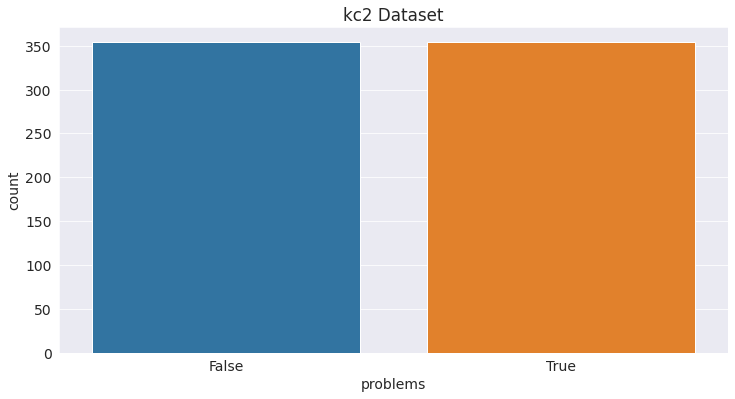

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  0.86
Confusion Matrix: 
 [[81 13]
 [ 1  5]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  81 
False positives:  13 
False negatives:  1 
True Positives:  5


###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[81 13]
 [ 1  5]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  81 
False positives:  13 
False negatives:  1 
True Positives:  5


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.86


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.86      0.92        94
        True       0.28      0.83      0.42         6

    accuracy                           0.86       100
   macro avg       0.63      0.85      0.67       100
weighted avg       0.95      0.86      0.89       100



##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[82 12]
 [ 3  3]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  82 
False positives:  12 
False negatives:  3 
True Positives:  3


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.85


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.87      0.92        94
        True       0.20      0.50      0.29         6

    accuracy                           0.85       100
   macro avg       0.58      0.69      0.60       100
weighted avg       0.92      0.85      0.88       100



##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[84 10]
 [ 4  2]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  84 
False positives:  10 
False negatives:  4 
True Positives:  2


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.86


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.89      0.92        94
        True       0.17      0.33      0.22         6

    accuracy                           0.86       100
   macro avg       0.56      0.61      0.57       100
weighted avg       0.91      0.86      0.88       100



##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[84 10]
 [ 4  2]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  84 
False positives:  10 
False negatives:  4 
True Positives:  2


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 0.998587570621469
Test data accuracy: 0.81


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.84      0.89        94
        True       0.12      0.33      0.17         6

    accuracy                           0.81       100
   macro avg       0.53      0.59      0.53       100
weighted avg       0.90      0.81      0.85       100



#**pc1**

In [ ]:
pc1_df

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
1,91,9,3,2,318,2089.21,0.04,27.68,75.47,57833.24,...,80,44,11,31,29,66,192,126,17,True
2,109,21,5,18,381,2547.56,0.04,28.37,89.79,72282.68,...,97,41,12,24,28,75,229,152,38,True
3,505,106,41,82,2339,20696.93,0.01,75.93,272.58,1571506.88,...,457,71,48,49,64,397,1397,942,178,True
4,107,25,7,14,619,4282.78,0.02,52.91,80.95,226588.75,...,103,32,4,39,35,86,359,260,40,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,6,4,4,1,26,96.21,0.08,13.33,7.22,1282.82,...,6,0,0,2,10,3,18,8,7,False
1104,10,5,5,1,43,182.66,0.05,21.00,8.70,3835.88,...,10,0,0,1,14,5,28,15,9,False
1105,5,3,3,1,17,62.91,0.21,4.80,13.11,301.96,...,5,0,0,0,8,5,11,6,5,False
1106,18,8,5,5,111,613.12,0.04,22.92,26.75,14050.56,...,18,0,0,1,22,24,61,50,15,False


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = pc1_df.iloc[:,:-1]
y = pc1_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

###Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


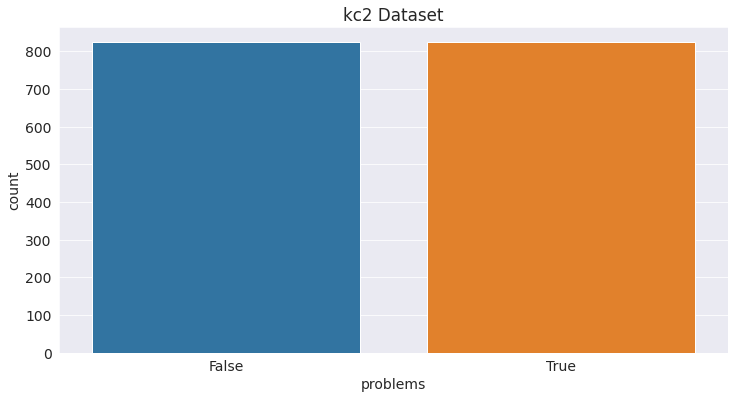

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  0.8288288288288288
Confusion Matrix: 
 [[172  35]
 [  3  12]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  172 
False positives:  35 
False negatives:  3 
True Positives:  12


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.83      0.90       207
        True       0.26      0.80      0.39        15

    accuracy                           0.83       222
   macro avg       0.62      0.82      0.64       222
weighted avg       0.93      0.83      0.87       222



###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[161  46]
 [  5  10]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  161 
False positives:  46 
False negatives:  5 
True Positives:  10


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7702702702702703


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.78      0.86       207
        True       0.18      0.67      0.28        15

    accuracy                           0.77       222
   macro avg       0.57      0.72      0.57       222
weighted avg       0.92      0.77      0.82       222



##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[189  18]
 [  7   8]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  189 
False positives:  18 
False negatives:  7 
True Positives:  8


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8873873873873874


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.91      0.94       207
        True       0.31      0.53      0.39        15

    accuracy                           0.89       222
   macro avg       0.64      0.72      0.66       222
weighted avg       0.92      0.89      0.90       222



##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[203   4]
 [ 11   4]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  203 
False positives:  4 
False negatives:  11 
True Positives:  4


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.9324324324324325


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.98      0.96       207
        True       0.50      0.27      0.35        15

    accuracy                           0.93       222
   macro avg       0.72      0.62      0.66       222
weighted avg       0.92      0.93      0.92       222



##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[203   4]
 [ 11   4]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  203 
False positives:  4 
False negatives:  11 
True Positives:  4


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 0.9981796116504854
Test data accuracy: 0.8603603603603603


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.89      0.92       207
        True       0.21      0.40      0.28        15

    accuracy                           0.86       222
   macro avg       0.58      0.65      0.60       222
weighted avg       0.90      0.86      0.88       222



#**jm1**

In [ ]:
jm1_df

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
1,72,7,1,6,198,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
2,190,3,1,3,600,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
3,37,4,1,4,126,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True
4,31,2,1,2,111,582.52,0.08,12.25,47.55,7135.87,...,19,0,5,0,14,24,69,42,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10879,18,4,1,4,52,241.48,0.14,7.33,32.93,1770.86,...,13,0,2,0,10,15,30,22,7,False
10880,9,2,1,2,30,129.66,0.12,8.25,15.72,1069.68,...,5,0,2,0,12,8,19,11,3,False
10881,42,4,1,2,103,519.57,0.04,26.40,19.68,13716.72,...,29,1,10,0,18,15,59,44,7,False
10882,10,1,1,1,36,147.15,0.12,8.44,17.44,1241.57,...,6,0,2,0,9,8,21,15,1,False


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = jm1_df.iloc[:,:-1]
y = jm1_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

###Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


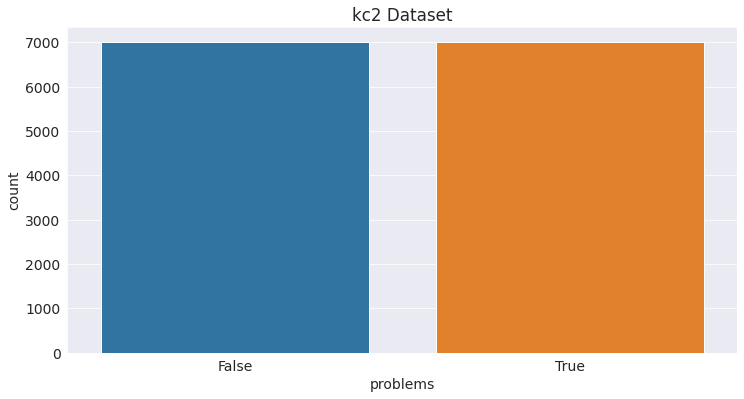

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  0.7141544117647058
Confusion Matrix: 
 [[1327  449]
 [ 173  227]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  1327 
False positives:  449 
False negatives:  173 
True Positives:  227


###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[1471  305]
 [ 211  189]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  1471 
False positives:  305 
False negatives:  211 
True Positives:  189


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7628676470588235


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.83      0.85      1776
        True       0.38      0.47      0.42       400

    accuracy                           0.76      2176
   macro avg       0.63      0.65      0.64      2176
weighted avg       0.78      0.76      0.77      2176



##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[1389  387]
 [ 224  176]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  1389 
False positives:  387 
False negatives:  224 
True Positives:  176


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7192095588235294


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.78      0.82      1776
        True       0.31      0.44      0.37       400

    accuracy                           0.72      2176
   macro avg       0.59      0.61      0.59      2176
weighted avg       0.76      0.72      0.74      2176



##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[1506  270]
 [ 244  156]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  1506 
False positives:  270 
False negatives:  244 
True Positives:  156


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7637867647058824


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.85      0.85      1776
        True       0.37      0.39      0.38       400

    accuracy                           0.76      2176
   macro avg       0.61      0.62      0.62      2176
weighted avg       0.77      0.76      0.77      2176



##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[1506  270]
 [ 244  156]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  1506 
False positives:  270 
False negatives:  244 
True Positives:  156


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 0.9871428571428571
Test data accuracy: 0.7118566176470589


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.77      0.81      1776
        True       0.31      0.45      0.36       400

    accuracy                           0.71      2176
   macro avg       0.58      0.61      0.59      2176
weighted avg       0.76      0.71      0.73      2176



#**ar1 Dataset**

In [ ]:
ar1_df

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters,defects
0,9,0,1,0,8,7,8,15,20,15,...,0,0,2,0.25,0.00,0,0.00,0.22,0,False
1,21,0,14,1,7,15,12,21,36,27,...,4,1,4,0.57,1.00,1,0.25,0.19,0,False
2,30,0,11,0,19,16,18,50,70,34,...,9,2,9,0.47,1.11,1,0.11,0.30,0,True
3,8,0,2,0,6,4,5,5,10,9,...,1,0,2,0.33,1.00,1,0.50,0.25,0,False
4,7,0,1,0,6,4,5,4,11,9,...,0,0,2,0.33,0.00,2,1.00,0.29,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,32,0,5,0,27,16,11,33,56,27,...,9,1,8,0.30,1.00,0,0.00,0.25,0,False
116,6,0,0,0,6,3,5,5,11,8,...,2,0,3,0.50,1.00,0,0.00,0.50,0,False
117,6,0,0,0,6,6,6,6,11,12,...,2,1,2,0.33,1.00,1,0.50,0.33,0,False
118,27,0,3,0,24,16,9,26,44,25,...,8,3,6,0.25,1.00,1,0.17,0.22,0,False


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = ar1_df.iloc[:,:-1]
y = ar1_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

###Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


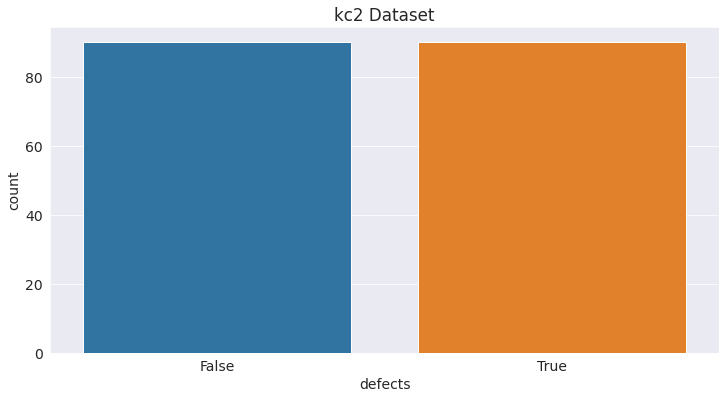

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  0.75
Confusion Matrix: 
 [[17  4]
 [ 2  1]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  17 
False positives:  4 
False negatives:  2 
True Positives:  1


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.81      0.85        21
        True       0.20      0.33      0.25         3

    accuracy                           0.75        24
   macro avg       0.55      0.57      0.55        24
weighted avg       0.81      0.75      0.78        24



###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[16  5]
 [ 2  1]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  16 
False positives:  5 
False negatives:  2 
True Positives:  1


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7083333333333334


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.76      0.82        21
        True       0.17      0.33      0.22         3

    accuracy                           0.71        24
   macro avg       0.53      0.55      0.52        24
weighted avg       0.80      0.71      0.75        24



##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[19  2]
 [ 1  2]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  19 
False positives:  2 
False negatives:  1 
True Positives:  2


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.875


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.90      0.93        21
        True       0.50      0.67      0.57         3

    accuracy                           0.88        24
   macro avg       0.72      0.79      0.75        24
weighted avg       0.89      0.88      0.88        24



##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[20  1]
 [ 1  2]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  20 
False positives:  1 
False negatives:  1 
True Positives:  2


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.9166666666666666


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.95      0.95        21
        True       0.67      0.67      0.67         3

    accuracy                           0.92        24
   macro avg       0.81      0.81      0.81        24
weighted avg       0.92      0.92      0.92        24



##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[20  1]
 [ 1  2]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  20 
False positives:  1 
False negatives:  1 
True Positives:  2


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 0.9944444444444445
Test data accuracy: 0.875


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      1.00      0.93        21
        True       0.00      0.00      0.00         3

    accuracy                           0.88        24
   macro avg       0.44      0.50      0.47        24
weighted avg       0.77      0.88      0.82        24



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**ar3 Dataset**

In [ ]:
ar3_df

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters,defects
0,3,0,0,0,3,4,6,6,8,10,...,0,0,1,0.33333,0.0000,0,0.000000,0.333330,0,False
1,268,72,22,0,174,125,23,337,484,148,...,94,32,64,0.36782,1.0106,0,0.000000,0.238810,0,False
2,11,2,0,0,9,10,4,15,17,14,...,0,0,1,0.11111,0.0000,2,2.000000,0.090909,0,False
3,9,2,0,0,7,7,4,11,13,11,...,0,0,1,0.14286,0.0000,1,1.000000,0.111110,0,False
4,10,2,0,0,8,7,4,13,15,11,...,0,0,1,0.12500,0.0000,2,2.000000,0.100000,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,173,59,22,6,92,77,31,277,352,108,...,53,14,40,0.43478,1.0189,0,0.000000,0.231210,0,True
58,114,32,12,3,70,46,23,134,180,69,...,27,7,22,0.31429,1.0370,1,0.045455,0.192980,0,False
59,148,41,5,0,102,42,16,147,208,58,...,24,7,18,0.17647,1.0000,0,0.000000,0.121620,0,False
60,10,0,0,0,10,11,7,30,38,18,...,12,6,7,0.70000,1.0000,1,0.142860,0.700000,0,False


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = ar3_df.iloc[:,:-1]
y = ar3_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

###Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


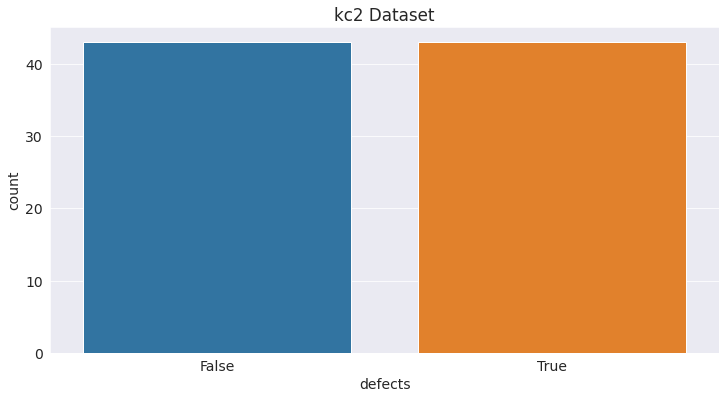

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  0.7692307692307693
Confusion Matrix: 
 [[10  2]
 [ 1  0]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  10 
False positives:  2 
False negatives:  1 
True Positives:  0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.83      0.87        12
        True       0.00      0.00      0.00         1

    accuracy                           0.77        13
   macro avg       0.45      0.42      0.43        13
weighted avg       0.84      0.77      0.80        13



###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[10  2]
 [ 1  0]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  10 
False positives:  2 
False negatives:  1 
True Positives:  0


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7692307692307693


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.83      0.87        12
        True       0.00      0.00      0.00         1

    accuracy                           0.77        13
   macro avg       0.45      0.42      0.43        13
weighted avg       0.84      0.77      0.80        13



##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[11  1]
 [ 1  0]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  11 
False positives:  1 
False negatives:  1 
True Positives:  0


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8461538461538461


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.92      0.92        12
        True       0.00      0.00      0.00         1

    accuracy                           0.85        13
   macro avg       0.46      0.46      0.46        13
weighted avg       0.85      0.85      0.85        13



##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[11  1]
 [ 1  0]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  11 
False positives:  1 
False negatives:  1 
True Positives:  0


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8461538461538461


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.92      0.92        12
        True       0.00      0.00      0.00         1

    accuracy                           0.85        13
   macro avg       0.46      0.46      0.46        13
weighted avg       0.85      0.85      0.85        13



##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[11  1]
 [ 1  0]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  11 
False positives:  1 
False negatives:  1 
True Positives:  0


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.9230769230769231


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      1.00      0.96        12
        True       0.00      0.00      0.00         1

    accuracy                           0.92        13
   macro avg       0.46      0.50      0.48        13
weighted avg       0.85      0.92      0.89        13



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**ar4 Dataset**

In [ ]:
ar4_df

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters,defects
0,53,22,5,0,26,18,16,38,54,34,...,5,2,5,0.19231,1.2,0,0.00,0.094340,1,False
1,25,10,1,0,14,12,14,42,58,26,...,1,0,2,0.14286,1.0,0,0.00,0.080000,2,False
2,73,22,8,1,43,25,12,67,97,37,...,15,7,9,0.20930,1.0,0,0.00,0.123290,0,False
3,69,21,17,0,31,16,9,28,48,25,...,13,6,8,0.25806,1.0,0,0.00,0.115940,0,False
4,42,18,1,0,23,12,10,23,39,22,...,7,1,7,0.30435,1.0,0,0.00,0.166670,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,71,27,9,0,35,19,16,53,80,35,...,5,1,6,0.17143,1.2,0,0.00,0.084507,0,False
102,79,40,5,0,34,23,10,52,79,33,...,9,2,8,0.23529,1.0,2,0.25,0.101270,0,False
103,19,8,0,0,11,8,14,19,29,22,...,1,0,3,0.27273,2.0,0,0.00,0.157890,2,False
104,119,59,13,0,47,20,23,68,107,43,...,10,2,10,0.21277,1.1,2,0.20,0.084034,0,False


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = ar4_df.iloc[:,:-1]
y = ar4_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

###Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


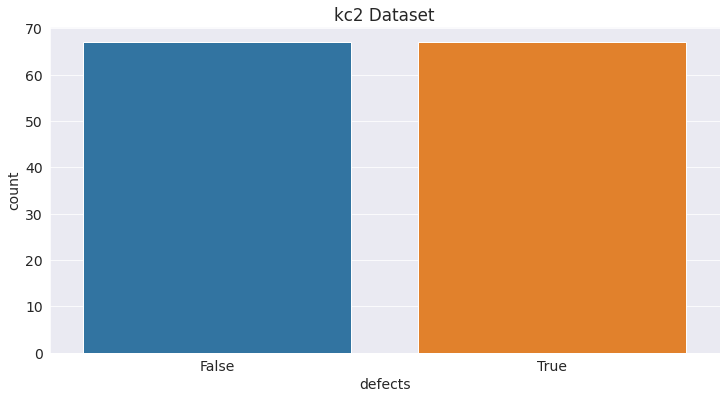

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  0.7272727272727273
Confusion Matrix: 
 [[14  5]
 [ 1  2]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  14 
False positives:  5 
False negatives:  1 
True Positives:  2


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.74      0.82        19
        True       0.29      0.67      0.40         3

    accuracy                           0.73        22
   macro avg       0.61      0.70      0.61        22
weighted avg       0.85      0.73      0.77        22



###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[15  4]
 [ 1  2]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  15 
False positives:  4 
False negatives:  1 
True Positives:  2


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7727272727272727


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.79      0.86        19
        True       0.33      0.67      0.44         3

    accuracy                           0.77        22
   macro avg       0.64      0.73      0.65        22
weighted avg       0.86      0.77      0.80        22



##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[18  1]
 [ 3  0]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  18 
False positives:  1 
False negatives:  3 
True Positives:  0


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8181818181818182


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.95      0.90        19
        True       0.00      0.00      0.00         3

    accuracy                           0.82        22
   macro avg       0.43      0.47      0.45        22
weighted avg       0.74      0.82      0.78        22



##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[16  3]
 [ 1  2]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  16 
False positives:  3 
False negatives:  1 
True Positives:  2


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8181818181818182


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.84      0.89        19
        True       0.40      0.67      0.50         3

    accuracy                           0.82        22
   macro avg       0.67      0.75      0.69        22
weighted avg       0.87      0.82      0.84        22



##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[16  3]
 [ 1  2]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  16 
False positives:  3 
False negatives:  1 
True Positives:  2


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8181818181818182


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.95      0.90        19
        True       0.00      0.00      0.00         3

    accuracy                           0.82        22
   macro avg       0.43      0.47      0.45        22
weighted avg       0.74      0.82      0.78        22



#**ar5 Dataset**

In [ ]:
ar5_df

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters,defects
0,16,6,2,1,8,13,6,18,20,19,...,0,0,2,0.250000,0.0000,1,0.500000,0.125000,1,False
1,31,12,3,2,16,18,9,31,42,27,...,5,0,6,0.375000,1.0000,1,0.166670,0.193550,0,False
2,477,104,89,2,284,150,29,482,699,179,...,116,25,93,0.327460,1.0172,4,0.043011,0.194970,0,True
3,11,2,0,0,9,10,4,15,17,14,...,0,0,1,0.111110,0.0000,2,2.000000,0.090909,0,False
4,9,2,0,0,7,7,4,11,13,11,...,0,0,1,0.142860,0.0000,1,1.000000,0.111110,0,False
5,10,2,0,0,8,7,4,13,15,11,...,0,0,1,0.125000,0.0000,2,2.000000,0.100000,0,False
6,5,0,0,0,5,5,3,5,9,8,...,0,0,1,0.200000,0.0000,3,3.000000,0.200000,0,False
7,28,5,1,0,22,18,12,49,53,30,...,3,1,4,0.181820,1.3333,2,0.500000,0.142860,1,False
8,26,6,0,0,20,16,11,41,44,27,...,1,0,3,0.150000,2.0000,2,0.666670,0.115380,0,False
9,15,4,0,0,11,11,5,19,22,16,...,0,0,1,0.090909,0.0000,7,7.000000,0.066667,1,False


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = ar5_df.iloc[:,:-1]
y = ar5_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

###Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


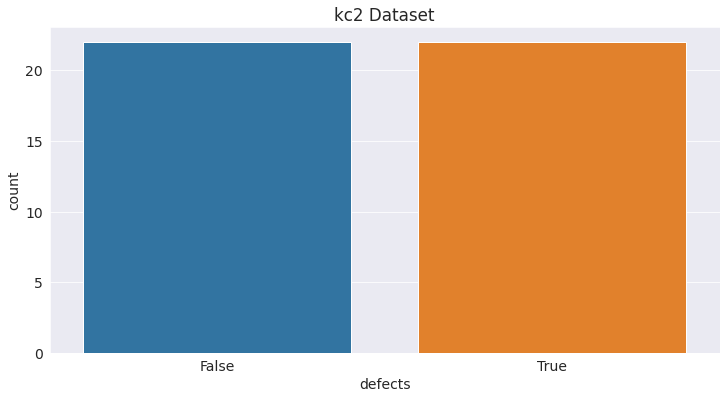

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  1.0
Confusion Matrix: 
 [[5 0]
 [0 2]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  5 
False positives:  0 
False negatives:  0 
True Positives:  2


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         5
        True       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[5 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  5 
False positives:  0 
False negatives:  1 
True Positives:  1


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8571428571428571


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.83      1.00      0.91         5
        True       1.00      0.50      0.67         2

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7



##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[5 0]
 [2 0]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  5 
False positives:  0 
False negatives:  2 
True Positives:  0


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7142857142857143


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.71      1.00      0.83         5
        True       0.00      0.00      0.00         2

    accuracy                           0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[5 0]
 [0 2]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  5 
False positives:  0 
False negatives:  0 
True Positives:  2


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  1.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         5
        True       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[5 0]
 [0 2]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  5 
False positives:  0 
False negatives:  0 
True Positives:  2


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.7142857142857143


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.71      1.00      0.83         5
        True       0.00      0.00      0.00         2

    accuracy                           0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**ar6 Dataset**

In [ ]:
ar6_df

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters,defects
0,13,0,1,0,12,10,8,21,26,18,...,0,0,2,0.17,0.00,0.0,0.00,0.15,0.0,False
1,20,0,12,0,8,14,12,21,34,26,...,3,0,4,0.50,1.00,0.0,0.00,0.20,0.0,False
2,40,0,17,0,23,20,18,64,90,38,...,11,2,11,0.48,1.09,1.0,0.09,0.28,0.0,False
3,8,0,3,0,5,7,13,13,21,20,...,1,0,3,0.60,2.00,0.0,0.00,0.38,1.0,False
4,10,0,2,0,8,4,5,5,10,9,...,1,0,2,0.25,1.00,1.0,0.50,0.20,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,27,0,10,0,17,15,9,36,48,24,...,4,1,4,0.24,1.00,5.0,1.25,0.15,0.0,False
96,9,0,0,0,9,7,3,8,15,10,...,0,0,1,0.11,0.00,6.0,6.00,0.11,0.0,False
97,10,0,7,0,3,7,3,7,15,10,...,0,0,1,0.33,0.00,6.0,6.00,0.10,0.0,False
98,51,2,17,0,32,26,9,44,69,35,...,6,0,7,0.22,1.00,8.0,1.14,0.14,0.0,False


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = ar6_df.iloc[:,:-1]
y = ar6_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

###Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


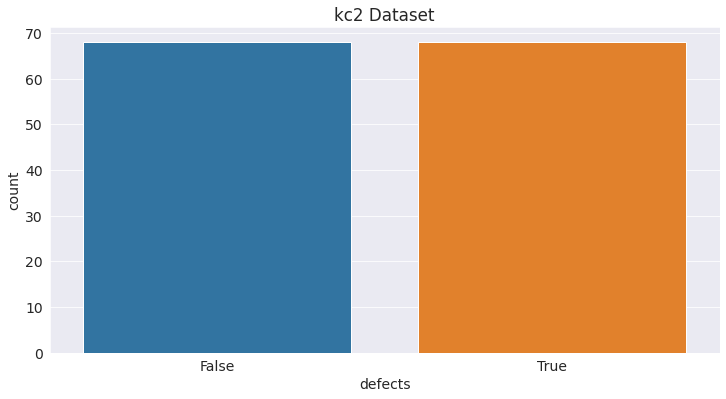

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  0.75
Confusion Matrix: 
 [[13  4]
 [ 1  2]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  13 
False positives:  4 
False negatives:  1 
True Positives:  2


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.76      0.84        17
        True       0.33      0.67      0.44         3

    accuracy                           0.75        20
   macro avg       0.63      0.72      0.64        20
weighted avg       0.84      0.75      0.78        20



###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[14  3]
 [ 1  2]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  14 
False positives:  3 
False negatives:  1 
True Positives:  2


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.82      0.87        17
        True       0.40      0.67      0.50         3

    accuracy                           0.80        20
   macro avg       0.67      0.75      0.69        20
weighted avg       0.85      0.80      0.82        20



##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[14  3]
 [ 2  1]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  14 
False positives:  3 
False negatives:  2 
True Positives:  1


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.75


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.82      0.85        17
        True       0.25      0.33      0.29         3

    accuracy                           0.75        20
   macro avg       0.56      0.58      0.57        20
weighted avg       0.78      0.75      0.76        20



##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[15  2]
 [ 1  2]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  15 
False positives:  2 
False negatives:  1 
True Positives:  2


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.85


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.88      0.91        17
        True       0.50      0.67      0.57         3

    accuracy                           0.85        20
   macro avg       0.72      0.77      0.74        20
weighted avg       0.87      0.85      0.86        20



##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[15  2]
 [ 1  2]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  15 
False positives:  2 
False negatives:  1 
True Positives:  2


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.65


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.71      0.77        17
        True       0.17      0.33      0.22         3

    accuracy                           0.65        20
   macro avg       0.51      0.52      0.50        20
weighted avg       0.75      0.65      0.69        20

